In [1]:
import numpy as np #needed for better consistency
# now import the class STC that would be used for statistical analysis
from stat_test_calculator import StatTestCalculator

In [2]:
#Here we create example data distributions

#One binned (counting) experiment. Currentely it is important to create an array with len = 1
one_binned = {'singal':np.array([30]), 'background':np.array([100]), 'data':np.array([130])} #s=30, b=100, observed=120

#Distribution of data (data is present as histogram)
#!!! it is important for all arrays to be of the same shape !!!
histogram = {
    'singal': np.array([7, 13, 25, 22, 11, 4]),
    'background':np.array([70, 69, 73, 75, 67, 63]),
    'data':np.array([76, 80, 94, 98, 78, 64])
    } #example distributions 

In [3]:
#Now lets create an object of STC class. All the needed distributions, settings, methods and modes can be passed
#directly to the constructor
#For example here we create an object to calculate one-binned expected discovery significance with no uncertainty:
stc_one_binned_no_delta = StatTestCalculator(
    data=one_binned['data'],
    signal_hist=one_binned['singal'],
    background_hist=one_binned['background'],
    mode='significance', #or 'upper_limits' for UL calculations
    delta=None, #no uncertainty of background events
    delta_s=None, #no uncertainty of signal events
    prior=None, #since here we have no uncertainty 
    ntoys=10000, #number of toy expetiments (the more the more accurate)
    method='hybrid', #or 'frequentist' if accuracy is not required
    #here one can pass a callable python function if custom test statistic is needed
    test_stat_type='q', #for accurate calculations or 'clsb' for less accurate but faster calculations
    syst_type='uncorrelated', #since one binned - does not matter
    verbose=True #to monitor the calculations
)

#Also lets create an example object of STC class to calculate upper limits for mu parameter with delta=20%
stc_histogram = StatTestCalculator(
    data=histogram['data'],
    signal_hist=histogram['singal'],
    background_hist=histogram['background'],
    mode='upper_limits',
    ul_grid = np.linspace(1,5,100), #set the possible values for UL to scan 
    delta=0.2, #delta=20% - relative systematic uncertainty of background
    delta_s=None, #no uncertainty of signal events
    prior='lognormal', #or 'gauss'
    method='hybrid', #or 'frequentist' if accuracy is not required
    #here one can pass a callable python function if custom test statistic is needed
    test_stat_type='q', #for accurate calculations or 'clsb' for less accurate but faster calculations
    syst_type='uncorrelated', #or 'correlated' if systematic uncertainty is correlated between bins
    verbose=True #to monitor the calculations
)

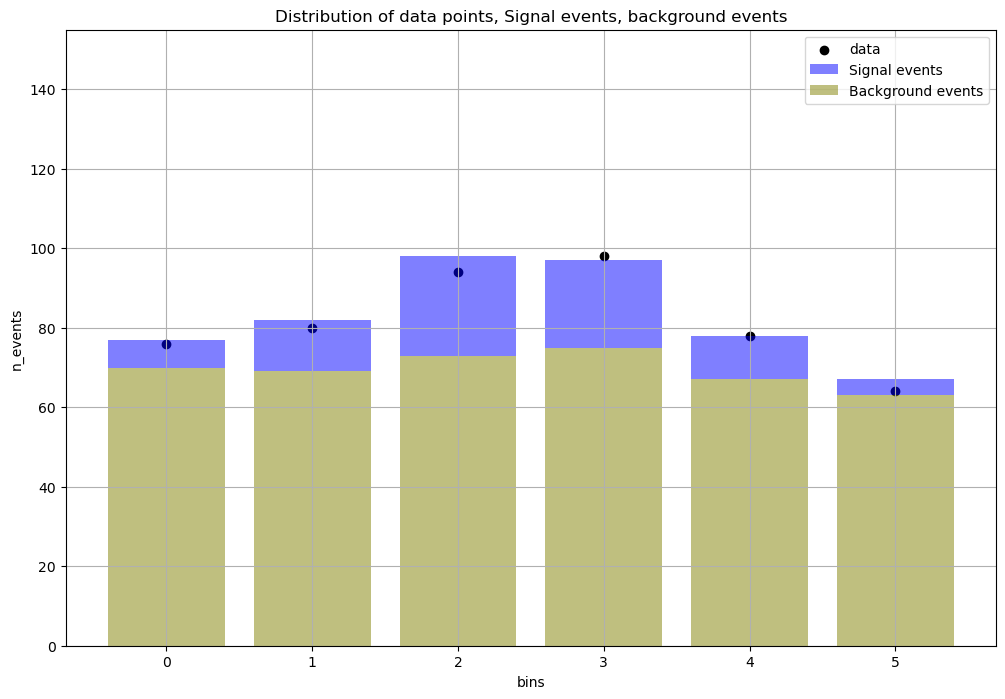

In [4]:
#now we can use our STC to plot the data
#one can directly pass their distributions to this method
#but since we already imported our data we can pass only path for the plot
#if more specific desing is needed one can modify this method in stat_test_calculator.py

stc_histogram.plot_data(path='example_data.png')

In [5]:
#now lets perform our calculations
#First we will calculate the expected significance in our example counting experiment

#Perform Monte-Carlo calculations
print(stc_one_binned_no_delta.monte_carlo_hypotest()) #no additional parameters are needed since we already set all the parameters

#the output of monte_carlo_hypotest() is tuple(p_value, significance)

#Perform asymptotic calculations
print('Asymptotic significance:', stc_one_binned_no_delta.asymptotic_hypotest())


0/10000
500/10000
1000/10000
1500/10000
2000/10000
2500/10000
3000/10000
3500/10000
4000/10000
4500/10000
5000/10000
5500/10000
6000/10000
6500/10000
7000/10000
7500/10000
8000/10000
8500/10000
9000/10000
9500/10000
Observed statistic: 8.215, p-value: 0.00130, significance: 3.011σ
(0.0013, 3.011453758499792)
Asymptotic significance: 2.866131323151064


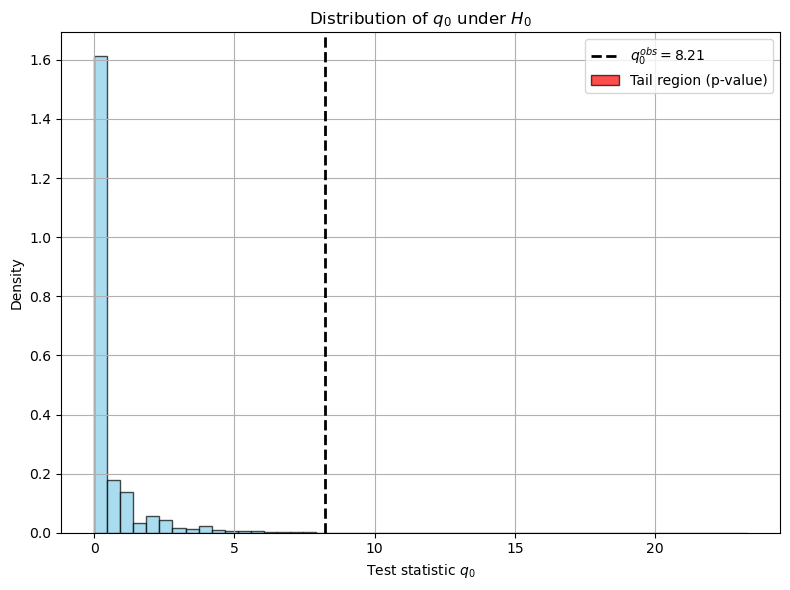

In [6]:
#After we performed out calculations we can plot the resulting Monte-Carlo simulated distribution
stc_one_binned_no_delta.plot_hypo_test(path='example_result_distribution.png')

In [7]:
#Now we can perform an analysis of our histograms
print(stc_histogram.monte_carlo_hypotest(test_stat_type='clsb')) #test_stat_type='clsb' for faster calculations
print(stc_histogram.asymptotic_hypotest()) 

mu=1.00: p=0.439
mu=1.04: p=0.418
mu=1.08: p=0.372
mu=1.12: p=0.328
mu=1.16: p=0.297
mu=1.20: p=0.275
mu=1.24: p=0.244
mu=1.28: p=0.215
mu=1.32: p=0.186
mu=1.36: p=0.162
mu=1.40: p=0.144
mu=1.44: p=0.117
mu=1.48: p=0.103
mu=1.53: p=0.083
mu=1.57: p=0.077
mu=1.61: p=0.059
mu=1.65: p=0.049
Approx. 95% CL upper limit: mu < 1.65
1.6464646464646466
1.6995854531498393


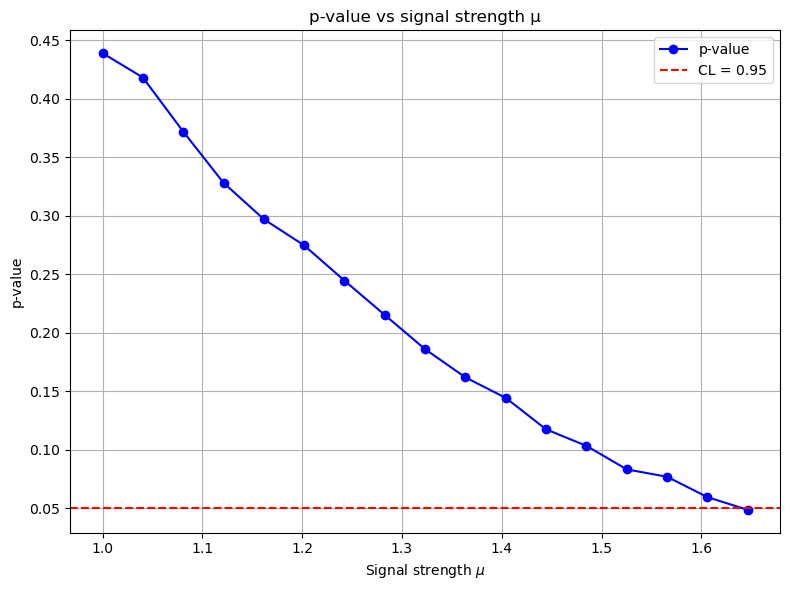

In [8]:
#and we can plot the resulting distributions again
stc_histogram.plot_hypo_test(path='example_result_distribution.png')